<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 5<a id='top'></a>

- <a href='#section1'>5.1 Calculate Singular-Value Decomposition</a>
- <a href='#section2'>5.2 Compress gray scale images </a>
- <a href='#section3'>5.3 Compress color images</a>
- <a href='#section4'>5.4 SVD for Pseudoinverse </a>
- <a href='#section5'>5.5 Principal Component Analysis</a>
- <a href='#section6'>5.6 EigenFaces - Face Classification in Python</a>


## 5.1 Calculate Singular-Value Decomposition<a id='section1'></a>

The SVD can be calculated by calling the `svd()` function.

The function takes a matrix and returns the $U$, $\Sigma$ and $V^T$ elements. The Sigma diagonal matrix is returned as a vector of singular values. The $V$ matrix is returned in a transposed form, e.g. `V.T`.

The example below defines a 3×2 matrix and calculates the Singular-value decomposition.

In [13]:
# Singular-value decomposition
import numpy as np

# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)


# SVD
U, s, VT = np.linalg.svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


### Reconstruct Matrix from SVD
The original matrix can be reconstructed from the U, Sigma, and V^T elements.

The U, s, and V elements returned from the `svd()` cannot be multiplied directly.

The s vector must be converted into a diagonal matrix using the `diag()` function. By default, this function will create a square matrix that is n x n, relative to our original matrix. This causes a problem as the size of the matrices do not fit the rules of matrix multiplication, where the number of columns in a matrix must match the number of rows in the subsequent matrix.

We can achieve this by creating a new Sigma matrix of all zero values that is $m \times n$ (e.g. more rows) and populate the first $n \times n$ part of the matrix with the square diagonal matrix calculated via `diag()`.

In [14]:
# Reconstruct SVD
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)


# Singular-value decomposition
U, s, VT = np.linalg.svd(A)

print(A.shape)
print(A.shape[0])

#A.shape return (3,2), 0th is the number of rows, 1st index is the number of columns.
#A.shape[0] is the number of row, A.shape[1] is the number of columns.

# create m x n Sigma matrix
# we need this step because s is a list of float numbers (singular values), not a matrix.
Sigma = np.zeros(A.shape)

# populate Sigma with n x n diagonal matrix
# np.diag() generate diagonal matrix, (len(s) x len(s))
# A.shape[1] is the number of columns of A --- recall A = np.array([[1, 2], [3, 4], [5, 6]])
# A.shape[1] = [1,2], and the 
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)


# reconstruct matrix
B = U@Sigma@VT
print(B)


[[1 2]
 [3 4]
 [5 6]]
(3, 2)
3
[[1. 2.]
 [3. 4.]
 [5. 6.]]


The above complication with the Sigma diagonal only exists with the case where m and n are not equal. The diagonal matrix can be used directly when reconstructing a square matrix, as follows.

In [15]:
# Reconstruct SVD
# define a matrix
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

# Singular-value decomposition
U, s, VT = np.linalg.svd(A)
# create n x n Sigma matrix
Sigma = np.diag(s)
# reconstruct matrix
B = U@Sigma@VT
print(B)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


The reconstructed approximation of the original matrix is done using a subset of singular vectors as below in the compress_svd function . We use numpy array slicing to select k singular vectors and values. Instead of storing $m\times n$ values for the original image, we can now store $k(m+n)+k$ values

In [16]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,VT = np.linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),VT[:k,:])) # we trim all three matrix to k columns/rows, and then multiply them together
   
    return reconst_matrix,s


<a href='#top'>jump to the top</a>

## 5.2 Compress gray scale images <a id='section2'></a>

In [17]:
from ipywidgets import interact,interactive,interact_manual
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-image

'conda' is not recognized as an internal or external command,
operable program or batch file.


We will use skimage image processing library (from sci-kit family of packages) for working with images in python. skimage has a module called data which makes available a set of images for exploration. We will load some images and convert them into a gray scale format. These images are stored in a python dict object gray_images.

In [19]:
from skimage import data
from skimage.color import rgb2gray

# data: scikit-image provides access to various sample images that can be used for testing and learning purposes.
# rgb2gray: a function that is used to convert a color image represented as 3-channel RGC mage into grayscale image.

ModuleNotFoundError: No module named 'skimage'

In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(), # these lines load grayscale iamges directly from the library
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

The function `compress_show_gray_images` below takes in the image name (img_name) and number of singular values/vectors(k) to be used in the compressed reconstruction. It also plots the singular values and the image.

In [ ]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]) # just simple math
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

Use the below interactive widget to explore how the quality of the reconstructed image varies with $k$

In [ ]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));
# interact is a jupyter notebook feature. 

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'camera', 'coin', 'clock', 'bl…

<a href='#top'>jump to the top</a>

## 5.3 Compress color images <a id='section3'></a>

In [ ]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())
    
}

# img_as_float converts an input image to a floating point representation.

Color images are represented in python as 3 dimensional numpy arrays - the third dimension to represent the color values (red,green blue). However, svd method is applicable to two dimensional matrices. So we have to find a way to convert the 3 dimensional array to 2 dimensional arrays, apply svd and reconstruct it back as a 3 dimensional array . There are two ways to do it. We will show both these methods below .
- reshape method
- Layer method

### Reshape method to compress a color image
This method involves flattening the third dimension of the image array into the second dimension using numpy's reshape method .

`image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))`

The svd decomposition is applied on the resulting reshaped array and reconstructed with the desired number of singular values/vectors. The image array is reshaped back to the three dimensions by another call to reshape method.

`image_reconst = image_reconst.reshape(original_shape)`

In [ ]:
def compress_show_color_images_reshape(img_name,k):
    """
     compress and display the reconstructed color image using the reshape method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

Here is the interactive widget to explore image compression of color images using the reshape method. By dragging the slider to vary $k$, observe how image quality varies. Also, we can explore different images by selecting through the drop down widget.

In [ ]:
interact(compress_show_color_images_reshape,img_name=list(color_images.keys()),k=(0,512));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

### Layers method to compress color images
In the function compress_show_color_images_layer, we treat a color image as a stack of 3 seperate two dimensional images (Red,blue and green layers) . We apply the truncated svd reconstruction on each two dimensional layer seperately.

`image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]`

And we put back the reconstructed layers together.
```
image_reconst = np.zeros(image.shape)
for i in range(3):
   image_reconst[:,:,i] = image_reconst_layers[i]
```

In [ ]:
def compress_show_color_images_layer(img_name,k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    
    plt.imshow(image_reconst)

Here is the widget to explore layers method of compressing color images.

In [ ]:
interact(compress_show_color_images_layer,img_name=list(color_images.keys()),k=(1,550));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

<a href='#top'>jump to the top</a>

## 5.4 SVD for Pseudoinverse <a id='section4'></a>

The pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are not equal.

It is also called the the Moore-Penrose Inverse after two independent discoverers of the method or the Generalized Inverse.

The pseudoinverse provides one way of solving the linear regression equation, specifically when there are more rows than there are columns, which is often the case.

NumPy provides the function `pinv()` for calculating the pseudoinverse of a rectangular matrix.

The example below defines a $4\times 2$ matrix and calculates the pseudoinverse.

In [ ]:
# Pseudoinverse
import numpy as np

# define matrix
A = np.array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)

# calculate pseudoinverse
B = np.linalg.pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  9.07607323e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


We can calculate the pseudoinverse manually via the SVD and compare the results to the `pinv()` function.

First we must calculate the SVD. Next we must calculate the reciprocal of each value in the s array. Then the s array can be transformed into a diagonal matrix with an added row of zeros to make it rectangular. Finally, we can calculate the pseudoinverse from the elements.

The specific implementation is:

In [ ]:
# define matrix
A = np.array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = np.linalg.svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = np.zeros(A.shape)

# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = np.diag(d)
# calculate pseudoinverse
B = VT.T@D.T@U.T
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  9.07607323e-15  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


<a href='#top'>jump to the top</a>

## 5.5 Principal Component Analysis<a id='section5'></a>

We can calculate a Principal Component Analysis on a dataset using the `PCA()` class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily.

When creating the class, the number of components can be specified as a parameter.

The class is first fit on a dataset by calling the `fit()` function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the `transform()` function.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

The example below demonstrates using this class by first creating an instance, fitting it on a $3\times 2$ matrix, accessing the values and vectors of the projection, and transforming the original data.

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print('A= ', A)

# create the PCA instance and fit on data
pca = PCA(n_components=2).fit(A)

# access values and vectors
print(f"components: {pca.components_}")
# These vectors represent the dirextion of maximum variance in your original data. 
# The first component explinas most of the variance (Principle axis)
# The second component represent the orthogonal direction of the second-most variance. 

print(f"explained variance: {pca.explained_variance_}")
# It contains the amount of ariance explained by each of the principal components. 

# transform data
B = pca.transform(A) 
# The function projects the original data A ont the new basis formed by the principal components. 
# The small values in the second column of B are a result of PCA reducing the dimensionality of the original data A
# while preserving as much variance as possible.
# Which means the transformed data is essentially aligned along the direction of the first principal component. 
print(f"transformed A: {B}")

A=  [[1 2]
 [3 4]
 [5 6]]
components: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
explained variance: [8.00000000e+00 2.25080839e-33]
transformed A: [[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


<a href='#top'>jump to the top</a>

## 5.6 EigenFaces - Face Classification in Python <a id='section6'></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC # support vector machine classifier from scikit-learn
from sklearn.model_selection import train_test_split 
# used to split a dataset into training and testing subsets for model evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
# confusion matrix is used to compute a confusion matrix for classification problems
# classification_report generates a text report showing various classification metrics, liek precision, recall and F1-score. 

import warnings
warnings.filterwarnings('ignore')
# this suppress all non critical 'warning' messages by the code

In [ ]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


Now we can quickly check for the shape of the dataset:

In [ ]:
df.shape

(400, 4097)

So, 400 rows and 4097 columns, a strange combination. For the columns we here have normalized pixels values (meaning values in the range (0, 1)), and by the end we have a target column, indicating which person is on the photo.

If we take a closer look at the number of unique elements of the target column, we’d get the total number of people in the dataset:

In [ ]:
df['target'].nunique()

# This is the number of class in multi-class classification problem

40

## Image Visualization

To visualize a couple of faces we’ll declare a function which transforms 1D vector to a 2D matrix, and uses Matplotlib’s imshow functionality to show it as a grayscale image:

In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

But before plotting, we need to separate features from the target, otherwise, our dataset will overflow the 64x64 matrix boundaries:

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

And that’s it, now we can use the declared function:

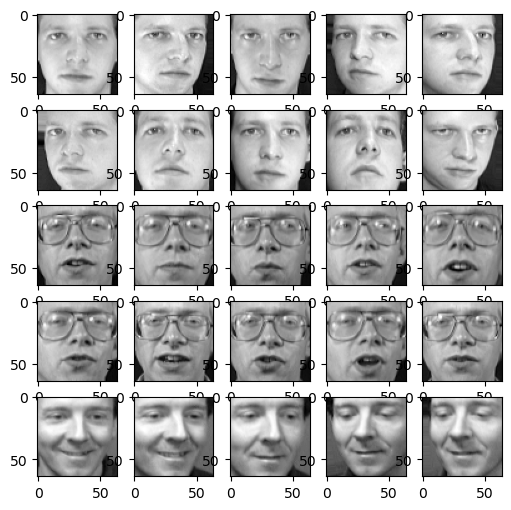

In [ ]:
plot_faces(X)

## Principal Component Analysis

The goal of this section is to reduce the dimensionality of our problem by keeping only those components that explain the most variance. That in a nutshell is a goal of PCA. But before doing so, we must split the dataset into training and testing portions:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # Normally, 80% for training, 20% data used for testing. 

# more parameters: test_size = 0.3 (taking more data for testing)
# random_state = 2: you will get the same split if you use the same random state value

Now we can apply the PCA on the training features. Then it’s easy to plot the cumulative sum of the explained variance, so we can approximate how many principal components are enough:

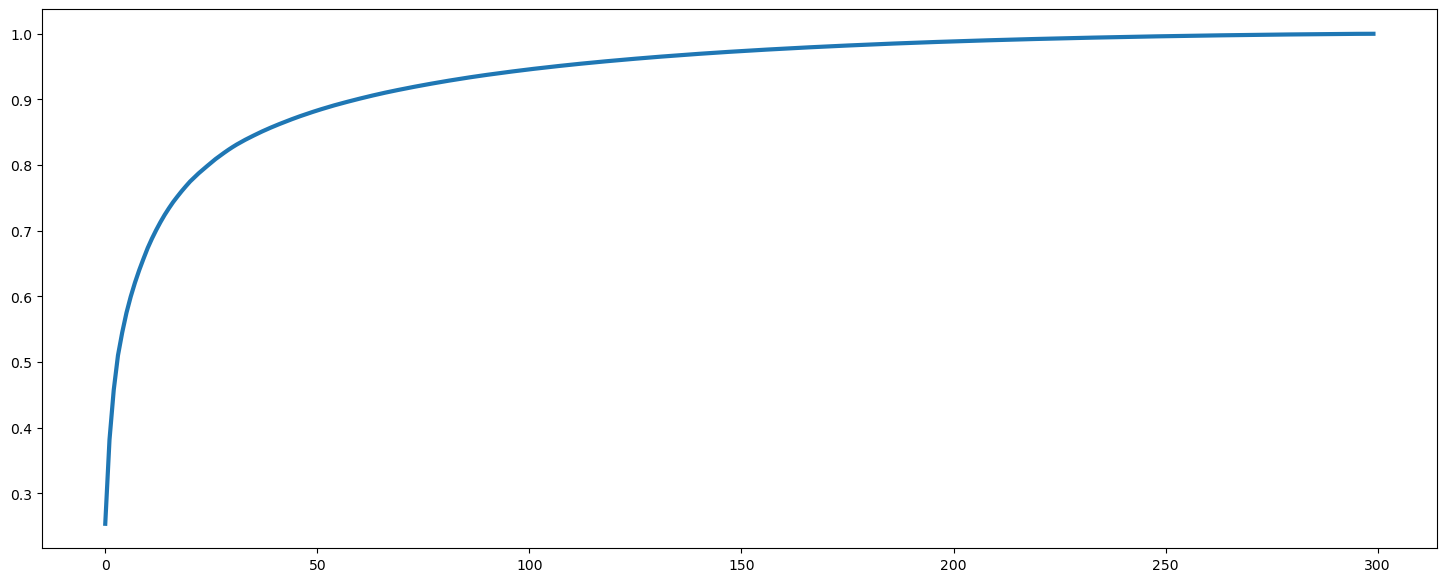

In [ ]:
pca = PCA().fit(X_train)
# Here, we dont specify the number of components of PCA, PCA will automatically determine the number of compoents 
# to retain based on the variance explained by each component.

# Exploratory data analysis: Omitting the number of component is used in EDA.
# Default, it return "full" or "maximum" PCA, where all available components are retained. 
# It allows you to visualize the explained variance ratio for all components. 

# '.fit(X_train)': calculates the principal components and other relevant information necessary for PCA. 

# `pca` return a list of properties:
# `components_`: the principal components themselves as a set of unit vectors
# `explained_variance_`: the vairance of the principal components 
# `singular_values_`
# `mean_`
# `n_components_`
# `oise_variance_`
# `explained_variance_ratio_`
# `covariance_`
# `transform(X)`: this method can be used to project reduced-dimensional data back into the original feature space. 
# `inverse_transform(X_reduced)`

plt.figure(figsize=(18, 7)) # setting up a 18 units in width and 7 units in height figure 
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3) # `lw=3` make the line width to be 3
# in this plot, you provide a single array of list of value, so it start from 0 and increase by 1 for each data point 

# In PCA, the number of principal components should be a positive integer. 

Just by looking at the chart, it seems like around 100 principal components will keep around 95% of the variance, but let’s verify that claim

In [ ]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

# getting the range where Explained ratio is larger than 0.95

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
        275, 276, 277, 278, 279, 280, 281, 282, 283

In [ ]:
value_at_index_105 = pca.explained_variance_ratio_.cumsum()[105]
print(value_at_index_105)

0.9495604223507051


Yes, it looks like 105 components will do the trick. Keep in mind that 95% isn’t set in stone, keep free to go for lower or higher percent on your own.

Let’s perform the PCA again, but this time with additional n_components argument:

In [ ]:
pca = PCA(n_components=105).fit(X_train)

# This time we specifies the number of components of PCA

In [ ]:
X_train_pca = pca.transform(X_train)

In [ ]:
"""
We are going to normalize the data in this cell
"""

nComp=105

mu = np.mean(X_train, axis=0) # axis = 0 : what's the data
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])

for i in range(Xhat.shape[0]):
    Xhat[i,:] += mu

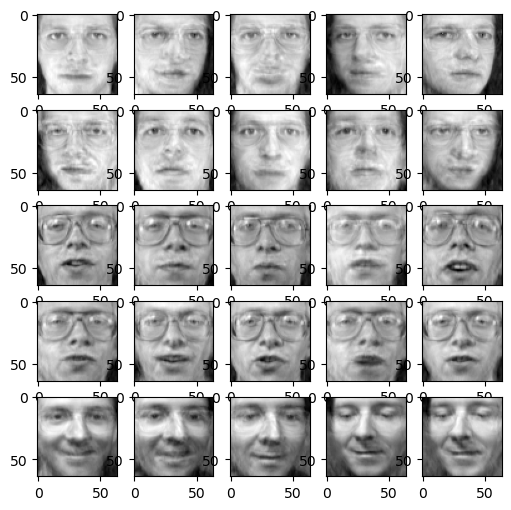

In [ ]:
plot_faces(Xhat)

## Model Training & Evaluation

By now have the training features transformed. The process of training the model is as simple as making an instance of it and fitting the training data:

In [ ]:
classifier = SVC().fit(X_train_pca, y_train)

Awesome! Model is now trained, and to evaluate it on the test set we’ll first need to bring the test features to the same feature space. Once done, SVM is used to make predictions:

In [ ]:
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca)

And now we can finally see it’s performance. For this we’ll use the classification_report from ScikitLearn, as it’s easier to look at than 40x40 confusion matrix:

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       0.25      1.00      0.40         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         4
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.57      0.73         7
          16       1.00      0.50      0.67         2
          17       0.00      0.00      0.00         0
          18       1.00    

So around 90% accuracy, certainly not terrible for 40 different classes and default model.

<a href='#top'>jump to the top</a>